# G2M insight for Cab Investment
The Client
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.  
### Project delivery:
You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.  
The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 
Data Set:  
You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:  
Cab_Data.csv – this file includes details of transaction for 2 cab companies   
Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer's demographic details   
Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode   
City.csv – this file contains list of US cities, their population and number of cab users   

Conduct data analysis and make a recommendation to XYZ as to the best cab company for investment.

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from datetime import timedelta, date
import matplotlib.pyplot as plt

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')
city_df = pd.read_csv('City.csv')

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data = cab_data.drop_duplicates()

In [5]:
cab_data.shape

(359392, 7)

In [6]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
customer_id = customer_id.drop_duplicates()

In [8]:
customer_id.shape

(49171, 4)

In [9]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
transaction_id = transaction_id.drop_duplicates()

In [11]:
transaction_id.shape

(440098, 3)

In [12]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [15]:
city_df = city_df.drop_duplicates()

In [20]:
city_df.shape

(20, 3)

In [21]:
customer_transaction_ids = customer_id.merge(transaction_id, how='inner', on='Customer ID')

In [22]:
customer_transaction_ids.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [23]:
customer_transaction_ids.shape

(440098, 6)

In [24]:
customer_transaction_ids.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID
count,440098.000000,440098.000000,440098.000000,4.400980e+05
mean,23619.513120,35.360197,15092.181989,1.022006e+07
std,21195.549816,12.582668,7987.309505,1.270455e+05
min,1.000000,18.000000,2000.000000,1.000001e+07
25%,3530.000000,25.000000,8391.000000,1.011004e+07
50%,15168.000000,33.000000,14767.000000,1.022006e+07
75%,43884.000000,42.000000,21084.000000,1.033008e+07
max,60000.000000,65.000000,35000.000000,1.044011e+07


In [25]:
customer_transaction_ids['Gender'].value_counts()

Male      256611
Female    183487
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Income (USD/Month)'>

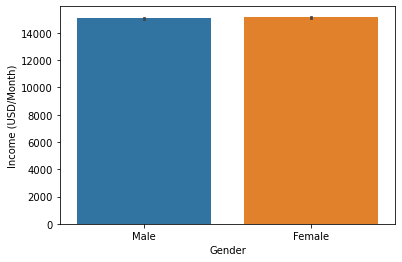

In [26]:
sns.barplot(y='Income (USD/Month)', x='Gender', data=customer_transaction_ids)

### Convert 5-digit date code to datetime 

In [27]:
cab_data_2 = cab_data.copy()
cab_data_2['Date'] = cab_data_2['Date of Travel'].apply(lambda x: date(1900,1,1)+timedelta(int(x)))
cab_data_2.drop(['Date of Travel'], axis=1, inplace=True)
cab_data_2.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05


In [28]:
#convert 'Date' column values to datatime format
cab_data_2['Date'] = pd.to_datetime(cab_data_2['Date'])
#cab_data_2[['KM Travelled', 'Price Charged', 'Cost of Trip']] = cab_data_2[['KM Travelled', 'Price Charged', 'Cost of Trip']].apply(pd.to_numeric,errors='ignore', axis=1)

In [29]:
cab_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Company         359392 non-null  object        
 2   City            359392 non-null  object        
 3   KM Travelled    359392 non-null  float64       
 4   Price Charged   359392 non-null  float64       
 5   Cost of Trip    359392 non-null  float64       
 6   Date            359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.9+ MB


In [30]:
#profit generated per trip
cab_data_2['Profit'] = round(cab_data_2['Price Charged'] - cab_data_2['Cost of Trip'] , 2)

In [31]:
#profit generated per km
cab_data_2['Profit per km'] = round(cab_data_2['Profit']/ cab_data_2['KM Travelled'] , 2)

In [32]:
# year, month number and day of week are extracted to separate columns
cab_data_2['Year'] = cab_data_2['Date'].apply(lambda x: x.year)
cab_data_2['Month'] = cab_data_2['Date'].apply(lambda x: x.month)
cab_data_2['Day_of_month'] = cab_data_2['Date'].apply(lambda x: x.day)
cab_data_2['Day_of_week']=cab_data_2['Date'].apply(lambda x: calendar.day_name[x.weekday()])

In [33]:
cab_data_2.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Profit per km,Year,Month,Day_of_month,Day_of_week
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10,57.32,1.88,2016,1,10,Sunday
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08,23.67,0.83,2016,1,8,Friday
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04,27.57,3.05,2016,1,4,Monday
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09,25.80,0.78,2016,1,9,Saturday
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05,16.84,1.93,2016,1,5,Tuesday


In [34]:
#calculate mean profit per km for each cab company and each year (between 2016 to 2019)
#first prepare a dictionary with the profits
annual_profit_per_km = {}

for company in ['Pink Cab', 'Yellow Cab']:
    an_profits = cab_data_2[cab_data_2['Company']== company].groupby('Year')['Profit per km'].mean()
    annual_profit_per_km[company] = an_profits
annual_profit_per_km

{'Pink Cab': Year
 2016    3.010930
 2017    2.961971
 2018    2.367773
 2019    3.107193
 Name: Profit per km, dtype: float64,
 'Yellow Cab': Year
 2016    7.490655
 2017    7.496318
 2018    6.379737
 2019    4.536040
 Name: Profit per km, dtype: float64}

In [35]:
#create dataframe from the dictionary then arrange data by melting the values from the company columns to make plotting easier
df_1 = pd.DataFrame(annual_profit_per_km, index = [2016, 2017, 2018, 2019])
df_1.reset_index(inplace=True)
df_1.rename(columns={'index':'Year'}, inplace=True)
df_1 = pd.melt(df_1, id_vars = 'Year', value_vars = ['Pink Cab', 'Yellow Cab'], 
               var_name = 'Company', value_name='Profit per km')
df_1

,Year,Company,Profit per km
0,2016,Pink Cab,3.010930
1,2017,Pink Cab,2.961971
2,2018,Pink Cab,2.367773
3,2019,Pink Cab,3.107193
4,2016,Yellow Cab,7.490655
5,2017,Yellow Cab,7.496318
6,2018,Yellow Cab,6.379737
7,2019,Yellow Cab,4.536040


## Evaluate annual profit/km for each cab company

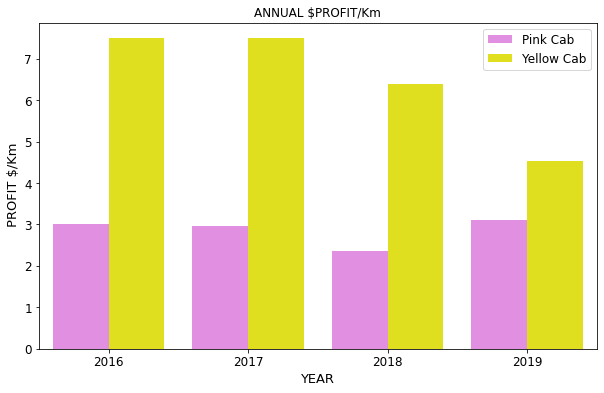

In [36]:
#plot profit per km for each company for each year
plt.figure(figsize=(10,6))
sns.barplot(data=df_1, x = 'Year', y = 'Profit per km', hue = 'Company',palette=['violet', 'yellow'])
plt.xlabel('YEAR', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel(' PROFIT $/Km',fontsize=13)
plt.yticks(fontsize=12)
plt.title('ANNUAL $PROFIT/Km')
plt.legend(fontsize = 12)
plt.show()

mean profit per km is higher for Yellow Cab but is gradually decreasing during the 4 years. The profits of Pink Cab is steady in comparison.

### Hypothesis testing : Annual profit per km between the two cab companies are significantly different

In [37]:
# Null hypethesis H0: Annual Pink Cab profit/km = Annual Yellow Cab profit/km i.e. no difference between the two groups
# Alternate hypothesis H1: Annual Pink Cab profit/km is significantly different from annual Yellow Cab profit/km

# For each year, use indepedent t-test to check if the mean profit/km are significantly different

for year in cab_data_2['Year'].unique():
    p_val=stats.ttest_ind(a=cab_data_2[(cab_data_2['Year']==year)&(cab_data_2['Company']=='Pink Cab')]['Profit per km'], 
                          b=cab_data_2[(cab_data_2['Year']==year)&(cab_data_2['Company']=='Yellow Cab')]['Profit per km'])
    if p_val[1]<=0.01:
        print(year, 'p =', p_val[1], 'p < 0.01 significant')
    elif p_val[1]<=0.05: 
        print(year, 'p =', p_val[1], 'p < 0.05 significant')
    else: print(year, 'p =', p_val[1], 'p > 0.05 NOT significant')
        
# The profit/km between the two cab companies are significantly different (p<0.01) for all the years.

2016 p = 0.0 p < 0.01 significant
2017 p = 0.0 p < 0.01 significant
2018 p = 0.0 p < 0.01 significant
2019 p = 0.0004033441596905147 p < 0.01 significant


## Evaluate annual number of rides for each cab company

In [38]:
#calculate the number of rides for each company for each year

num_rides_per_year = pd.DataFrame(columns=['Company', '2016', '2017', '2018', '2019'])

for company in ['Pink Cab', 'Yellow Cab']:
    num_rides = cab_data_2[cab_data_2['Company']== company].groupby('Year')['City'].count()
    num_rides_per_year = num_rides_per_year.append({'Company':company, '2016':num_rides.iloc[0], '2017':num_rides.iloc[1],
                                                   '2018':num_rides.iloc[2], '2019':num_rides.iloc[3]}, ignore_index=True)
num_rides_per_year

,Company,2016,2017,2018,2019
0,Pink Cab,24840,30301,29456,114
1,Yellow Cab,81399,98212,94671,399


In [39]:
#rearrange the data to make plotting easier
num_rides_per_year = pd.melt(num_rides_per_year, id_vars = 'Company', value_vars=['2016','2017','2018','2019'], 
                             var_name = 'Year', value_name = 'Num_rides')
num_rides_per_year

,Company,Year,Num_rides
0,Pink Cab,2016,24840
1,Yellow Cab,2016,81399
2,Pink Cab,2017,30301
3,Yellow Cab,2017,98212
4,Pink Cab,2018,29456
5,Yellow Cab,2018,94671
6,Pink Cab,2019,114
7,Yellow Cab,2019,399


<Figure size 720x432 with 0 Axes>

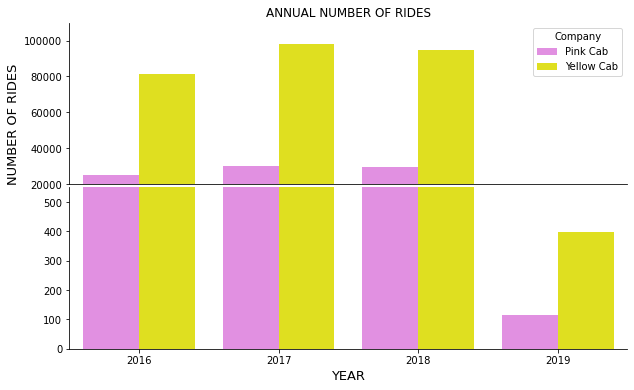

In [40]:
#plot the total number of rides for each company for each year with axis break to show partial data from 2019

plt.figure(figsize=(10,6))
plt.subplots(2,1,sharex=True, figsize=(10,6))
plt.subplots_adjust(hspace=0.02)
plt.subplot(2,1,1)
sns.barplot(data=num_rides_per_year, x = 'Year', y = 'Num_rides', hue = 'Company',palette=['violet', 'yellow'])
sns.despine()
plt.ylim(20000, 110000)
plt.xticks([],[])
plt.ylabel('NUMBER OF RIDES',fontsize=13, loc='bottom')
plt.title('ANNUAL NUMBER OF RIDES')
plt.subplot(2,1,2)
#plt.spines[['top', 'right']].set_visible(False)
sns.barplot(data=num_rides_per_year, x = 'Year', y = 'Num_rides', hue = 'Company',palette=['violet', 'yellow'])
plt.ylim(0, 550)
plt.ylabel('')
plt.legend().remove()
plt.xlabel('YEAR', fontsize=13)
sns.despine()
plt.show()

Yellow Cab garnered most of the rides for 2016, 2017 and 2018. We will assume a similar trend over the 2019 where only partial data is available

## Evaluate annual profit/km for each cab company for each city of operation

In [41]:
cab_data_2['City'].unique() #there are 19 unique cities in the dataset

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [42]:
#calculate mean profit per km for each cab company and each city
mean_profit_per_city = pd.DataFrame(columns = ['City', 'Company', 'Mean_profit_per_km'])
for city in cab_data_2['City'].unique():
    for company in ['Pink Cab', 'Yellow Cab']:
        mean_profit_per_km = round(cab_data_2[(cab_data_2['City']== city) & (cab_data_2['Company']== company)]['Profit per km'].mean(),2)
        mean_profit_per_city = mean_profit_per_city.append({'City':city, 'Company':company, 'Mean_profit_per_km':mean_profit_per_km}, 
                                                           ignore_index=True)

In [43]:
mean_profit_per_city.head()

,City,Company,Mean_profit_per_km
0,ATLANTA GA,Pink Cab,2.42
1,ATLANTA GA,Yellow Cab,5.79
2,AUSTIN TX,Pink Cab,3.60
3,AUSTIN TX,Yellow Cab,5.57
4,BOSTON MA,Pink Cab,2.23


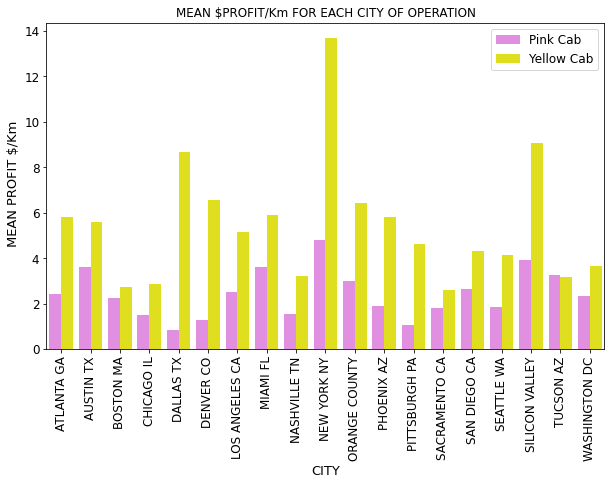

In [44]:
#plot mean profit for each cab company for each city 
plt.figure(figsize=(10,6))
sns.barplot(data=mean_profit_per_city, x = 'City', y = 'Mean_profit_per_km', hue = 'Company', palette=['violet', 'yellow'])
plt.xlabel('CITY', fontsize=13)
plt.xticks(fontsize=12, rotation = 90)
plt.ylabel(' MEAN PROFIT $/Km',fontsize=13)
plt.yticks(fontsize=12)
plt.title('MEAN $PROFIT/Km FOR EACH CITY OF OPERATION')
plt.legend(fontsize = 12)
plt.show()

In most of the cities, Yellow Cab profit/km exceeds that of Pink Cab 

### Hypothesis testing : Annual profit per km between the two cab companies are different in each city of operation except Tucson AZ

In [45]:
 # Null hypethesis H0: Annual Pink Cab profit/km = Annual Yellow Cab profit/km i.e. no difference between the two groups in each city
# Alternate hypothesis H1: Annual Pink Cab profit/km is significantly different from annual Yellow Cab profit/km in each city

# For each city, use indepedent t-test to check if the mean profit/km are significantly different

for city in cab_data_2['City'].unique():
    p_val=stats.ttest_ind(a=cab_data_2[(cab_data_2['City']==city)&(cab_data_2['Company']=='Pink Cab')]['Profit per km'], 
                          b=cab_data_2[(cab_data_2['City']==city)&(cab_data_2['Company']=='Yellow Cab')]['Profit per km'])
    if p_val[1]<=0.01:
        print(city, 'p =', p_val[1], 'p < 0.01 significant')
    elif p_val[1]<=0.05: 
        print(city, 'p =', p_val[1], 'p < 0.05 significant')
    else: print(city, 'p =', p_val[1], 'p > 0.05 NOT significant')
        
# The profit/km between the two cab companies are significantly different (p<0.01) for all the cities except Tuscon AZ.

ATLANTA GA p = 1.396643410574182e-301 p < 0.01 significant
AUSTIN TX p = 5.653328599868472e-81 p < 0.01 significant
BOSTON MA p = 5.304413716683572e-41 p < 0.01 significant
CHICAGO IL p = 0.0 p < 0.01 significant
DALLAS TX p = 0.0 p < 0.01 significant
DENVER CO p = 0.0 p < 0.01 significant
LOS ANGELES CA p = 0.0 p < 0.01 significant
MIAMI FL p = 8.774723107019721e-102 p < 0.01 significant
NASHVILLE TN p = 1.8770439193639463e-56 p < 0.01 significant
NEW YORK NY p = 0.0 p < 0.01 significant
ORANGE COUNTY p = 2.427863935778849e-125 p < 0.01 significant
PHOENIX AZ p = 1.1014351332390288e-140 p < 0.01 significant
PITTSBURGH PA p = 6.157788334144227e-52 p < 0.01 significant
SACRAMENTO CA p = 2.767737064173193e-11 p < 0.01 significant
SAN DIEGO CA p = 0.0 p < 0.01 significant
SEATTLE WA p = 1.3008435417691203e-270 p < 0.01 significant
SILICON VALLEY p = 0.0 p < 0.01 significant
TUCSON AZ p = 0.48311913099231474 p > 0.05 NOT significant
WASHINGTON DC p = 5.289002256591273e-178 p < 0.01 signifi

## Evaluate annual number of rides for each cab company for each city of operation

In [46]:
#Calculate number of rides per company per city for the whole period
rides_per_city = pd.DataFrame(columns = ['City', 'Company', 'Total_rides'])

for city in cab_data_2['City'].unique():
    for company in ['Pink Cab', 'Yellow Cab']:
        rides_p_city = cab_data_2[(cab_data_2['City']== city) & (cab_data_2['Company']== company)]['City'].count()
        rides_per_city = rides_per_city.append({'City':city, 'Company':company, 'Total_rides':rides_p_city}, 
                                                           ignore_index=True)

In [47]:
rides_per_city.head()

,City,Company,Total_rides
0,ATLANTA GA,Pink Cab,1762
1,ATLANTA GA,Yellow Cab,5795
2,AUSTIN TX,Pink Cab,1868
3,AUSTIN TX,Yellow Cab,3028
4,BOSTON MA,Pink Cab,5186


<Figure size 720x432 with 0 Axes>

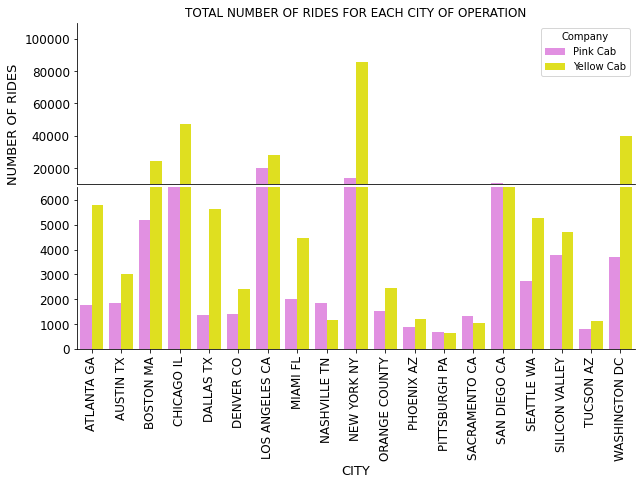

In [48]:
#plot the total number of rides for each company for each city with axis break to show the full range of data

plt.figure(figsize=(10,6))
plt.subplots(2,1,sharex=True, figsize=(10,6))
plt.subplots_adjust(hspace=0.02)
plt.subplot(2,1,1)
sns.barplot(data=rides_per_city, x = 'City', y = 'Total_rides', hue = 'Company', palette=['violet', 'yellow'])
sns.despine()
plt.ylim(10000, 110000)
plt.xticks([],[])
plt.yticks(fontsize=12)
plt.ylabel('NUMBER OF RIDES',fontsize=13, loc='bottom')
plt.title('TOTAL NUMBER OF RIDES FOR EACH CITY OF OPERATION')
plt.subplot(2,1,2)
#plt.spines[['top', 'right']].set_visible(False)
sns.barplot(data=rides_per_city, x = 'City', y = 'Total_rides', hue = 'Company', palette=['violet', 'yellow'])
plt.ylim(0, 6500)
plt.ylabel('')
plt.yticks(fontsize=12)
plt.legend().remove()
plt.xlabel('CITY', fontsize=13)
plt.xticks(fontsize=12, rotation = 90)
sns.despine()
plt.show()

With the exception of a few cities like Nashville TN, Pittsburgh PA, Tuscon AZ and Sacramento CA where the number of customers with Pink Cab marginally higher, Yellow Cab generally garners more rides than Pink Cab in all other cities

## Look at how gender of the rider relates to the cab company profits

In [49]:
#merge customer_transaction_ids df with cab_data_2 df
cab_data_customer_transaction_ids = customer_transaction_ids.merge(cab_data_2, how='inner', on='Transaction ID')

In [50]:
cab_data_customer_transaction_ids.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Profit per km,Year,Month,Day_of_month,Day_of_week
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,57.32,1.88,2016,1,10,Sunday
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,281.28,10.74,2018,7,23,Monday
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,194.65,4.57,2018,11,25,Sunday
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,23.67,0.83,2016,1,8,Friday
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,253.98,6.98,2018,4,23,Monday


In [51]:
#calculate the profit/km per company per year for each gender and create a data frame

year_company_gender_profit = pd.DataFrame()

for year in cab_data_customer_transaction_ids['Year'].unique():
    for company in cab_data_customer_transaction_ids['Company'].unique():
        for gender in cab_data_customer_transaction_ids['Gender'].unique():
            profit = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year) 
                                                       & (cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Gender']==gender)]['Profit per km'].mean()
            profit = round(profit,2)
            year_company_gender_profit=year_company_gender_profit.append({'Year':year, 'Company':company, 'Gender':gender, 
                                                                         'Mean_profit_per_km':profit}, ignore_index=True)

In [52]:
year_company_gender_profit = year_company_gender_profit.sort_values('Year', ignore_index=True)
year_company_gender_profit.head()

,Company,Gender,Mean_profit_per_km,Year
0,Pink Cab,Male,3.04,2016.0
1,Pink Cab,Female,2.98,2016.0
2,Yellow Cab,Male,7.63,2016.0
3,Yellow Cab,Female,7.30,2016.0
4,Pink Cab,Male,2.98,2017.0


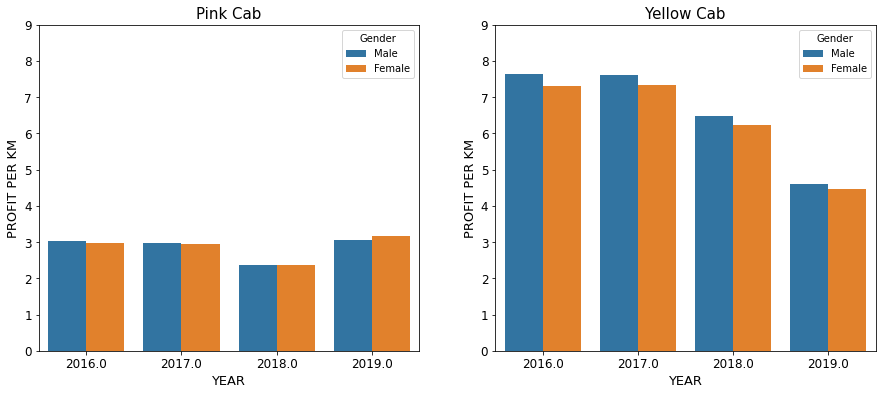

In [53]:
#plot gender-based profit/km for each company and for each year

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=year_company_gender_profit['Year'], 
            y=year_company_gender_profit[year_company_gender_profit['Company']=='Pink Cab']['Mean_profit_per_km'], 
            hue=year_company_gender_profit['Gender'])
plt.ylim(0,9)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('PROFIT PER KM', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x=year_company_gender_profit['Year'], 
            y=year_company_gender_profit[year_company_gender_profit['Company']=='Yellow Cab']['Mean_profit_per_km'], 
            hue=year_company_gender_profit['Gender'])
plt.ylim(0,9)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('PROFIT PER KM', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

There is no gender-based differences in the profits per km for either cab company for any of the years.

### Hypothesis testing : Annual profit per km between the two cab companies are the same between Male or Female genders

In [54]:
# Null hypethesis H0: Annual Pink Cab profit/km from female clinets = Annual Yellow Cab profit/km from male clients 
# i.e. no difference between the two gender groups
# Alternate hypothesis H1: Annual Pink Cab profit/km from female clinets is significantly different from annual 
# Yellow Cab profit/km from female clinets

# For each year, use indepedent t-test to check if the mean profit/km are significantly different

for company in cab_data_2['Company'].unique():
    for year in cab_data_2['Year'].unique():
        p_val=stats.ttest_ind(a=cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']==city)
                                                                  &(cab_data_customer_transaction_ids['Year']==year)
                                                                  &(cab_data_customer_transaction_ids['Gender']=='Male')]['Profit per km'], 
                              b=cab_data_2[(cab_data_customer_transaction_ids['Company']==city)
                                                                  &(cab_data_customer_transaction_ids['Year']==year)
                                                                  &(cab_data_customer_transaction_ids['Gender']=='Female')]['Profit per km'])
        if p_val[1]<=0.01:
            print(company, year, 'p =', p_val[1], 'p < 0.01 significant')
        elif p_val[1]<=0.05: 
            print(company, year, 'p =', p_val[1], 'p < 0.05 significant')
        else: print(company, year, 'p =', p_val[1], 'p > 0.05 NOT significant')

# The profit/km between the two cab companies are not significantly different (p>0.05) between Male and Female genders.

Pink Cab 2016 p = nan p > 0.05 NOT significant
Pink Cab 2017 p = nan p > 0.05 NOT significant
Pink Cab 2018 p = nan p > 0.05 NOT significant
Pink Cab 2019 p = nan p > 0.05 NOT significant
Yellow Cab 2016 p = nan p > 0.05 NOT significant
Yellow Cab 2017 p = nan p > 0.05 NOT significant
Yellow Cab 2018 p = nan p > 0.05 NOT significant
Yellow Cab 2019 p = nan p > 0.05 NOT significant


## Look at how gender of the rider relates to the number of rides

In [55]:
#calculate the number of rides per company per year for each gender group and create a data frame

year_company_gender_num_rides = pd.DataFrame()

for year in cab_data_customer_transaction_ids['Year'].unique():
    for company in cab_data_customer_transaction_ids['Company'].unique():
        for gender in cab_data_customer_transaction_ids['Gender'].unique():
            num_rides = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year) 
                                                       & (cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Gender']==gender)]['Gender'].count()
            
            year_company_gender_num_rides=year_company_gender_num_rides.append({'Year':year, 'Company':company, 'Gender':gender, 
                                                                         'Num_rides':num_rides}, ignore_index=True)

In [56]:
year_company_gender_num_rides.head()

,Company,Gender,Num_rides,Year
0,Pink Cab,Male,14074.0,2016.0
1,Pink Cab,Female,10766.0,2016.0
2,Yellow Cab,Male,47889.0,2016.0
3,Yellow Cab,Female,33510.0,2016.0
4,Pink Cab,Male,16262.0,2018.0


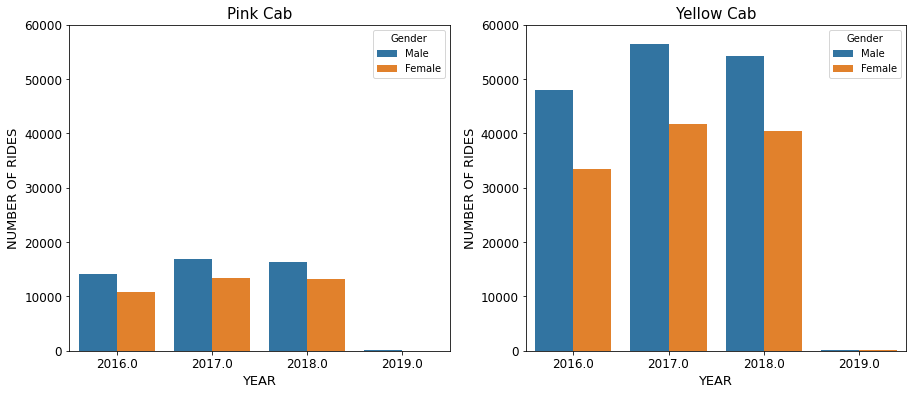

In [57]:
#plot gender-based rides for each company and for each year

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= year_company_gender_num_rides['Year'], 
            y= year_company_gender_num_rides[ year_company_gender_num_rides['Company']=='Pink Cab']['Num_rides'], 
            hue= year_company_gender_num_rides['Gender'])
plt.ylim(0,60000)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('NUMBER OF RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x= year_company_gender_num_rides['Year'], 
            y= year_company_gender_num_rides[ year_company_gender_num_rides['Company']=='Yellow Cab']['Num_rides'], 
            hue= year_company_gender_num_rides['Gender'])
plt.ylim(0,60000)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('NUMBER OF RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

There are more male riders for both cab companies for all the years. This difference is larger for Yellow Cab.

## Look at how monthly income of the rider relate to the company profit/km

In [58]:
cab_data_customer_transaction_ids.describe() #look at min max values for Income and age. Min is $2000/mo max is $35,000/mo

,Customer ID,Age,Income (USD/Month),Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per km,Year,Month,Day_of_month
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190113,137.253197,6.083574,2017.052628,7.475851,15.659784
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993661,160.311840,5.543494,0.802452,3.464767,8.797606
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,-5.000000,2016.000000,1.000000,1.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000,28.010000,2.000000,2016.000000,5.000000,8.000000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000,81.960000,4.470000,2017.000000,8.000000,16.000000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.683200,190.030000,9.170000,2018.000000,10.000000,23.000000
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000,1463.970000,41.120000,2019.000000,12.000000,31.000000


In [59]:
company_profits_rider_income = pd.DataFrame()

income_range = {'<5K':[0,5000], '5K-10K':[5000,10000], '10K-15K':[10000, 15000],
                '15K-20K':[15000, 20000], '20K-25K':[20000,25000], '25K-30K':[25000,30000], '>30K':[30000,100000]}

for year in cab_data_customer_transaction_ids['Year'].unique():
    for company in cab_data_customer_transaction_ids['Company'].unique():
        for income, inc_range in income_range.items():
            mean_profit = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year) 
                                                       & (cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Income (USD/Month)']>=inc_range[0])
                                                       & (cab_data_customer_transaction_ids['Income (USD/Month)']<inc_range[1])]['Profit per km'].mean()
            mean_profit=round(mean_profit,2)   
            company_profits_rider_income = company_profits_rider_income.append({'Year':year, 'Company':company, 'Income_range':income, 
                                                                         'Profit/km':mean_profit}, ignore_index=True)

In [60]:
company_profits_rider_income.head()

,Company,Income_range,Profit/km,Year
0,Pink Cab,<5K,2.92,2016.0
1,Pink Cab,5K-10K,3.01,2016.0
2,Pink Cab,10K-15K,2.95,2016.0
3,Pink Cab,15K-20K,3.12,2016.0
4,Pink Cab,20K-25K,3.02,2016.0


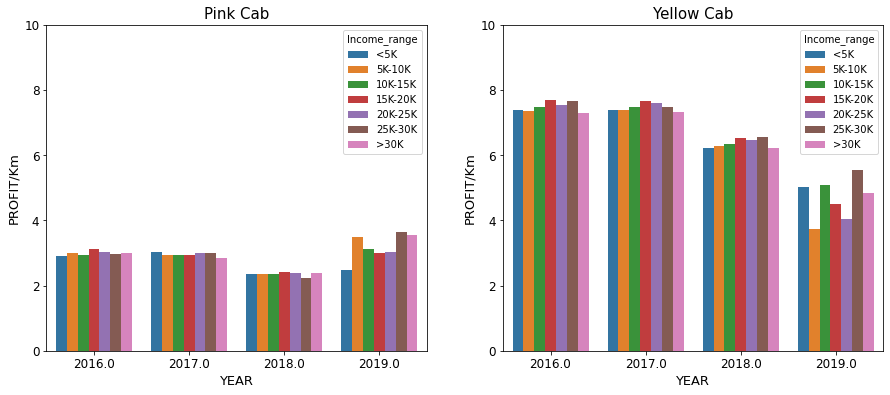

In [61]:
#plot customer income range for each company and for each year

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= company_profits_rider_income['Year'], 
            y= company_profits_rider_income[company_profits_rider_income['Company']=='Pink Cab']['Profit/km'], 
            hue= company_profits_rider_income['Income_range'])
plt.ylim(0,10)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('PROFIT/Km', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x= company_profits_rider_income['Year'], 
            y= company_profits_rider_income[company_profits_rider_income['Company']=='Yellow Cab']['Profit/km'], 
            hue= company_profits_rider_income['Income_range'])
plt.ylim(0,10)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('PROFIT/Km', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

There is no difference in the profit/km from any of the income levels

## Look at how monthly income of the rider relate to the number of rides for each company

In [62]:
rider_income = pd.DataFrame()

income_range = {'<5K':[0,5000], '5K-10K':[5000,10000], '10K-15K':[10000, 15000],
                '15K-20K':[15000, 20000], '20K-25K':[20000,25000], '25K-30K':[25000,30000], '>30K':[30000,100000]}

for year in cab_data_customer_transaction_ids['Year'].unique():
    for company in cab_data_customer_transaction_ids['Company'].unique():
        for income, inc_range in income_range.items():
            num_cust = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year) 
                                                       & (cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Income (USD/Month)']>=inc_range[0])
                                                       & (cab_data_customer_transaction_ids['Income (USD/Month)']<inc_range[1])]['Gender'].count()
               
            rider_income = rider_income.append({'Year':year, 'Company':company, 'Income_range':income, 
                                                                         'Num_rides':num_cust}, ignore_index=True)

In [63]:
rider_income.head()

,Company,Income_range,Num_rides,Year
0,Pink Cab,<5K,2944.0,2016.0
1,Pink Cab,5K-10K,4818.0,2016.0
2,Pink Cab,10K-15K,4791.0,2016.0
3,Pink Cab,15K-20K,4998.0,2016.0
4,Pink Cab,20K-25K,4959.0,2016.0


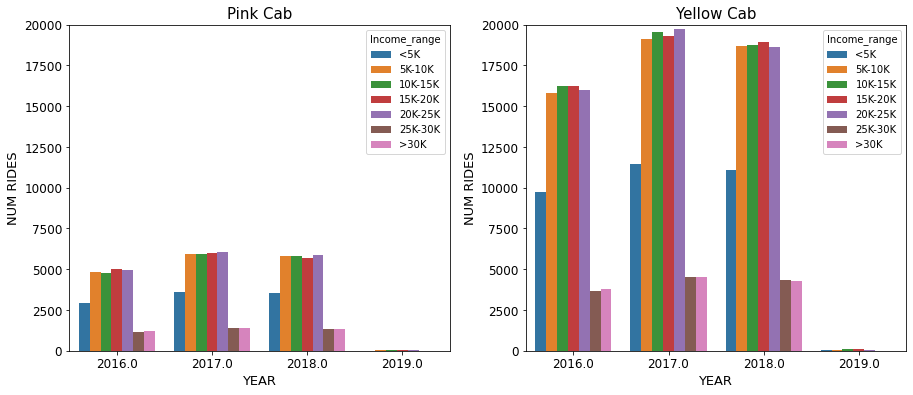

In [64]:
#plot customer income range for each company and for each year

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= rider_income['Year'], 
            y= rider_income[rider_income['Company']=='Pink Cab']['Num_rides'], 
            hue= rider_income['Income_range'])
plt.ylim(0,20000)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x= rider_income['Year'], 
            y= rider_income[rider_income['Company']=='Yellow Cab']['Num_rides'], 
            hue= rider_income['Income_range'])
plt.ylim(0,20000)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

Customers with monthly incomes less than $5000/month are less likely to hitch rides with either company compared those making between $5000 - $25000/month. Those making above $25000/month are the least likely customers of all. 

## Look at how the age of the rider relate to the number of rides 

In [65]:
age_range = {'<20':[0,20], '20-30':[20,30], '30-40':[30, 40],
                '40-50':[40, 50], '50-60':[50,60], '>60':[60,100]}

print(age_range)
for age, age_range in age_range.items():
    print(age, age_range)

{'<20': [0, 20], '20-30': [20, 30], '30-40': [30, 40], '40-50': [40, 50], '50-60': [50, 60], '>60': [60, 100]}
<20 [0, 20]
20-30 [20, 30]
30-40 [30, 40]
40-50 [40, 50]
50-60 [50, 60]
>60 [60, 100]


In [66]:
rider_age = pd.DataFrame()

age_range = {'<20':[0,20], '20-30':[20,30], '30-40':[30, 40],
                '40-50':[40, 50], '50-60':[50,60], '>60':[60,100]}

for year in cab_data_customer_transaction_ids['Year'].unique():
    for company in cab_data_customer_transaction_ids['Company'].unique():
        for age, a_range in age_range.items():
                                    
            num_cust = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year) 
                                                       & (cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Age']>=a_range[0])
                                                       & (cab_data_customer_transaction_ids['Age']<a_range[1])]['Age'].count()
               
            rider_age = rider_age.append({'Year':year, 'Company':company, 'Age_range':age, 
                                                                         'Num_rides':num_cust}, ignore_index=True)

In [67]:
rider_age.head()

,Age_range,Company,Num_rides,Year
0,<20,Pink Cab,1609.0,2016.0
1,20-30,Pink Cab,8002.0,2016.0
2,30-40,Pink Cab,7761.0,2016.0
3,40-50,Pink Cab,3152.0,2016.0
4,50-60,Pink Cab,2683.0,2016.0


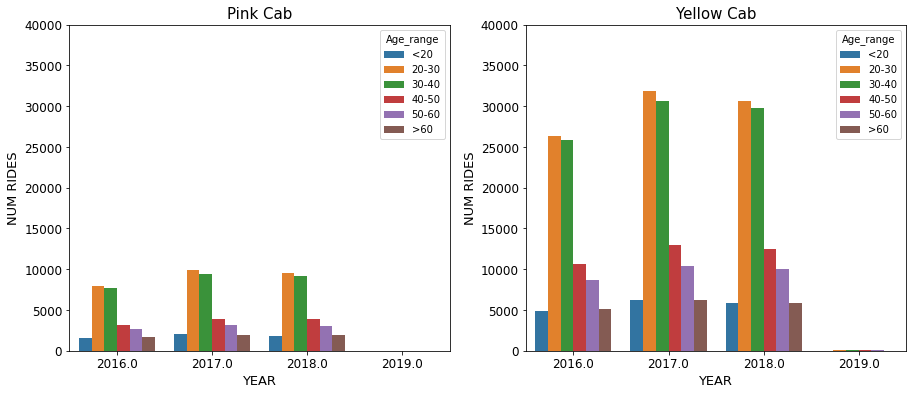

In [68]:
#plot customer age range for each company and for each year

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= rider_age['Year'], 
            y= rider_age[rider_age['Company']=='Pink Cab']['Num_rides'], 
            hue= rider_age['Age_range'])
plt.ylim(0,40000)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x= rider_age['Year'], 
            y= rider_age[rider_age['Company']=='Yellow Cab']['Num_rides'], 
            hue= rider_age['Age_range'])
plt.ylim(0,40000)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

Customers aged 20 to 40 years are most likely to take a cab compared to other age groups

### Look at how the age of the rider relate to the profit/Km

In [69]:
profit_rider_age = pd.DataFrame()

age_range = {'<20':[0,20], '20-30':[20,30], '30-40':[30, 40],
                '40-50':[40, 50], '50-60':[50,60], '>60':[60,100]}

for year in cab_data_customer_transaction_ids['Year'].unique():
    for company in cab_data_customer_transaction_ids['Company'].unique():
        for age, a_range in age_range.items():
                                    
            mean_profit = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year) 
                                                       & (cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Age']>=a_range[0])
                                                       & (cab_data_customer_transaction_ids['Age']<a_range[1])]['Profit per km'].mean()
               
            profit_rider_age = profit_rider_age.append({'Year':year, 'Company':company, 'Age_range':age, 
                                                                         'Profit/Km':mean_profit}, ignore_index=True)

In [70]:
profit_rider_age.head()

,Age_range,Company,Profit/Km,Year
0,<20,Pink Cab,3.030491,2016.0
1,20-30,Pink Cab,3.039020,2016.0
2,30-40,Pink Cab,2.999175,2016.0
3,40-50,Pink Cab,2.927985,2016.0
4,50-60,Pink Cab,3.010365,2016.0


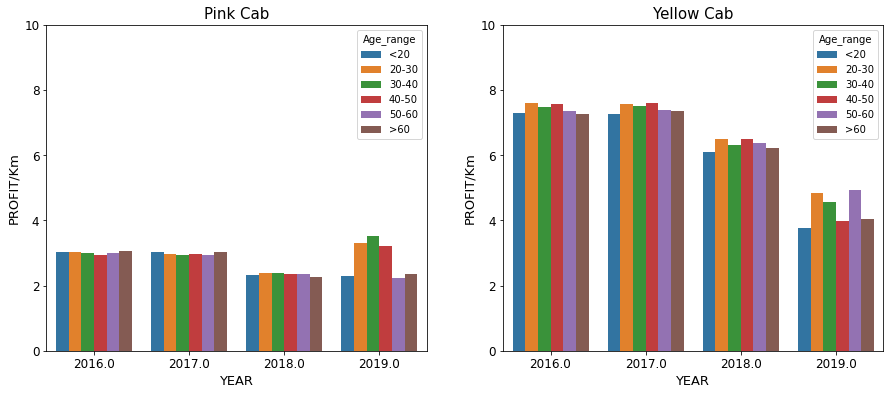

In [71]:
#plot profit/km for each customer age range for each company and for each year

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= profit_rider_age['Year'], 
            y= profit_rider_age[profit_rider_age['Company']=='Pink Cab']['Profit/Km'], 
            hue= profit_rider_age['Age_range'])
plt.ylim(0,10)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('PROFIT/Km', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x= profit_rider_age['Year'], 
            y= profit_rider_age[profit_rider_age['Company']=='Yellow Cab']['Profit/Km'], 
            hue= profit_rider_age['Age_range'])
plt.ylim(0,10)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('PROFIT/Km', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

## Is there any seasonality to the number of rides for each cab company?

In [72]:
cab_data_customer_transaction_ids.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Profit per km,Year,Month,Day_of_month,Day_of_week
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,57.32,1.88,2016,1,10,Sunday
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,281.28,10.74,2018,7,23,Monday
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,194.65,4.57,2018,11,25,Sunday
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,23.67,0.83,2016,1,8,Friday
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,253.98,6.98,2018,4,23,Monday


In [73]:
#calculate total rides for each company for each month of the year
ride_month = pd.DataFrame()

months = [1,2,3,4,5,6,7,8,9,10,11,12]

for company in cab_data_customer_transaction_ids['Company'].unique():
    for month in months:
        num_rides = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']==company)
                                                     & (cab_data_customer_transaction_ids['Month']==month)]['Month'].count()
        ride_month = ride_month.append({'Company':company, 'Month':month, 'Num_rides':num_rides}, ignore_index=True)

In [74]:
ride_month.head()

,Company,Month,Num_rides
0,Pink Cab,1.0,5502.0
1,Pink Cab,2.0,3347.0
2,Pink Cab,3.0,4067.0
3,Pink Cab,4.0,4104.0
4,Pink Cab,5.0,5058.0


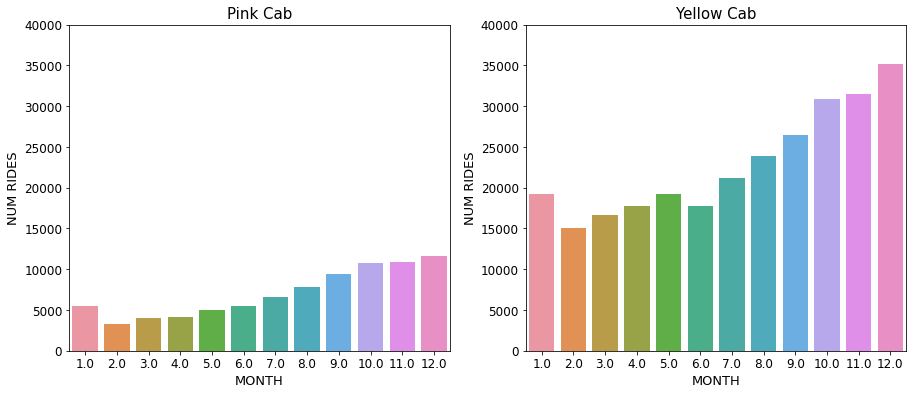

In [75]:
#plot number of rides for each company and for each month

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= ride_month['Month'], 
            y= ride_month[ride_month['Company']=='Pink Cab']['Num_rides'])
plt.ylim(0,40000)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('MONTH', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x= ride_month['Month'], 
            y= ride_month[ride_month['Company']=='Yellow Cab']['Num_rides'])
plt.ylim(0,40000)
plt.xlabel('MONTH', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Yellow Cab', fontsize=15)
plt.show()

Over 12 months from January, there is an initial drop in the number of rides in February but then it gradually increases until December.

In [76]:
cab_data_customer_transaction_ids.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Profit per km,Year,Month,Day_of_month,Day_of_week
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,57.32,1.88,2016,1,10,Sunday
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,281.28,10.74,2018,7,23,Monday
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,194.65,4.57,2018,11,25,Sunday
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,23.67,0.83,2016,1,8,Friday
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,253.98,6.98,2018,4,23,Monday


In [77]:
#calculate the number of rides for each day of the month
ride_day_of_month = pd.DataFrame()

for company in cab_data_customer_transaction_ids['Company'].unique():
    for day in np.sort(cab_data_customer_transaction_ids['Day_of_month'].unique()):
        num_cust = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']==company) 
                                                       & (cab_data_customer_transaction_ids['Day_of_month']==day)]['Day_of_month'].count()
        ride_day_of_month = ride_day_of_month.append({'Company':company, 'Day_of_month':str(day), 'Num_rides':num_cust}, ignore_index=True)

In [78]:
ride_day_of_month.head()

,Company,Day_of_month,Num_rides
0,Pink Cab,1,2626.0
1,Pink Cab,2,2779.0
2,Pink Cab,3,2875.0
3,Pink Cab,4,2664.0
4,Pink Cab,5,3124.0


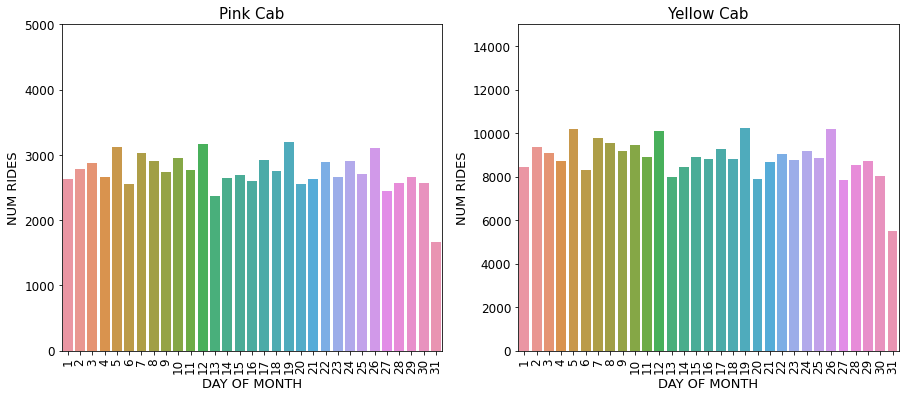

In [79]:
#plot number of rides for each company and for each day of the month

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= ride_day_of_month['Day_of_month'], 
            y= ride_day_of_month[ride_day_of_month['Company']=='Pink Cab']['Num_rides'])
plt.ylim(0,5000)
plt.title('Pink Cab', fontsize=15)
plt.xlabel('DAY OF MONTH', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.subplot(1,2,2)
sns.barplot(x= ride_day_of_month['Day_of_month'], 
            y= ride_day_of_month[ride_day_of_month['Company']=='Yellow Cab']['Num_rides'])
plt.ylim(0,15000)
plt.xlabel('DAY OF MONTH', fontsize=13)
plt.ylabel('NUM RIDES', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.title('Yellow Cab', fontsize=15)
plt.show()

There are spikes in demand for both companies on the 5th, 12th, 19th and 26th day of each month (i.e. every 7 days starting on the 5th).

## For each city, and for each year, what are the fractions of cab customers serviced by each company?

In [80]:
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [81]:
# how many cab customers are in each city? We make the assumption that the number of total cab users in each city are equal from
# one year to the next. city_df #contains population and total cab user numbers data

#the Users column values are strings with white spaces
#therefore strip white spaces, remove commas in the number (','), and convert string value to integers
city_df['Users'] = city_df['Users'].apply(lambda x: int(x.strip().replace(',', '')))

In [82]:
cab_data_customer_transaction_ids['Customer ID'].nunique()

46148

In [83]:
annual_frac_of_total = pd.DataFrame()

for year in [2016,2017,2018]:
    for city in cab_data_customer_transaction_ids['City'].unique():
        unique_yellow_cab_users = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year)
                                                                   & (cab_data_customer_transaction_ids['City']==city)
                                                                   &(cab_data_customer_transaction_ids['Company']=='Yellow Cab')]['Customer ID'].nunique()
        
        unique_pink_cab_users = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Year']==year)
                                                                   & (cab_data_customer_transaction_ids['City']==city)
                                                                   &(cab_data_customer_transaction_ids['Company']=='Pink Cab')]['Customer ID'].nunique()
        number_cab_users = city_df[city_df['City']==city]['Users'].iloc[0]
#         print(year, city , 'Yellow Cab users frac of total',unique_yellow_cab_users/number_cab_users, 
#               'Pink Cab Users frac of total', unique_pink_cab_users/number_cab_users)

        annual_frac_of_total = annual_frac_of_total.append({'Year':year, 'City': city, 
                                                            'Yellow_cab_frac_total':round(unique_yellow_cab_users/number_cab_users,4),
                                                            'Pink_cab_frac_total':round (unique_pink_cab_users/number_cab_users,4)}, ignore_index = True)


In [84]:
annual_frac_of_total.head()

,City,Pink_cab_frac_total,Year,Yellow_cab_frac_total
0,ATLANTA GA,0.0191,2016.0,0.0530
1,AUSTIN TX,0.0328,2016.0,0.0530
2,BOSTON MA,0.0150,2016.0,0.0344
3,CHICAGO IL,0.0109,2016.0,0.0180
4,DALLAS TX,0.0173,2016.0,0.0575


In [85]:
#reformat the data frame to make it easier to plot
annual_frac_of_total = pd.melt(annual_frac_of_total, id_vars = ['City', 'Year'], 
                               value_vars=['Pink_cab_frac_total', 'Yellow_cab_frac_total'],
                              var_name = 'Company', value_name='Fraction_of_total')
annual_frac_of_total

,City,Year,Company,Fraction_of_total
0,ATLANTA GA,2016.0,Pink_cab_frac_total,0.0191
1,AUSTIN TX,2016.0,Pink_cab_frac_total,0.0328
2,BOSTON MA,2016.0,Pink_cab_frac_total,0.0150
3,CHICAGO IL,2016.0,Pink_cab_frac_total,0.0109
4,DALLAS TX,2016.0,Pink_cab_frac_total,0.0173
...,...,...,...,...
109,SAN DIEGO CA,2018.0,Yellow_cab_frac_total,0.0295
110,SEATTLE WA,2018.0,Yellow_cab_frac_total,0.0539
111,SILICON VALLEY,2018.0,Yellow_cab_frac_total,0.0472
112,TUCSON AZ,2018.0,Yellow_cab_frac_total,0.0650


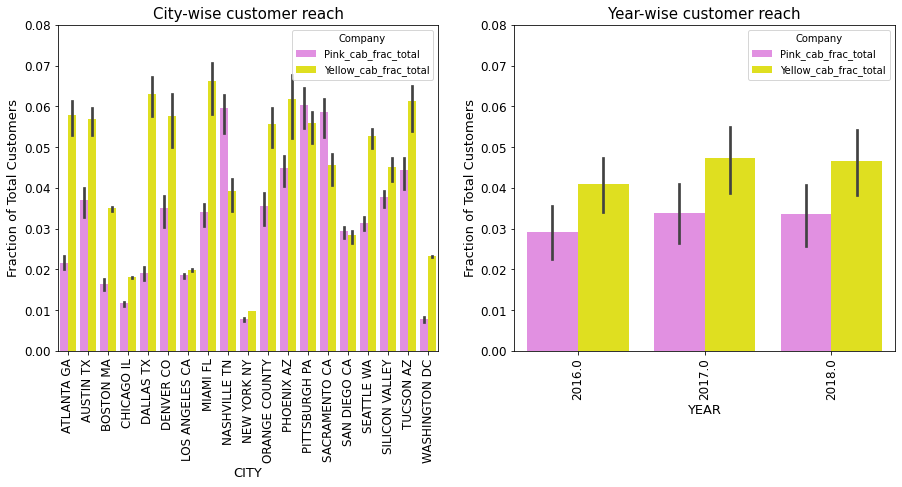

In [86]:
#plot number of rides for each company and for each day of the month

plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x= annual_frac_of_total['City'], 
            y= annual_frac_of_total['Fraction_of_total'], hue=annual_frac_of_total['Company'],palette=['violet', 'yellow'])
plt.ylim(0,0.08)
plt.title('City-wise customer reach', fontsize=15)
plt.xlabel('CITY', fontsize=13)
plt.ylabel('Fraction of Total Customers', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.subplot(1,2,2)
sns.barplot(x= annual_frac_of_total['Year'], 
            y= annual_frac_of_total['Fraction_of_total'], hue=annual_frac_of_total['Company'], palette=['violet', 'yellow'])
plt.ylim(0,0.08)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('Fraction of Total Customers', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.title('Year-wise customer reach', fontsize=15)
plt.show()

Yellow Cab has a wider customer reach in all cities except Pittsburgh PA, San Diego CA and Sacramento CA where Pink Cab has an upper hand. Looking at the data annually, Yellow Cab again commands more customers than Pink Cab for the years 2016 to 2018.

### Customer Loyalty to either of the two cab companies

In [122]:
cab_data_customer_transaction_ids.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Profit per km,Year,Month,Day_of_month,Day_of_week
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,57.32,1.88,2016,1,10,Sunday
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,281.28,10.74,2018,7,23,Monday
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,194.65,4.57,2018,11,25,Sunday
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,23.67,0.83,2016,1,8,Friday
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,253.98,6.98,2018,4,23,Monday


In [134]:
#for customers who have taken 5 or more rides, calculate the fraction of these rides with each cab company
# this block of code takes a long time to complete

customer_loyalty = pd.DataFrame()

for cust_id in cab_data_customer_transaction_ids['Customer ID'].unique():
    customer_num_total_rides = cab_data_customer_transaction_ids[cab_data_customer_transaction_ids['Customer ID']==cust_id]['Customer ID'].count()
    #only use Customer IDs of those customers who have taken at least 5 rides
    if customer_num_total_rides >= 5:
        Pink_cab_loyalty = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Customer ID']==cust_id)
                                                            & (cab_data_customer_transaction_ids['Company']=='Pink Cab')]['Customer ID'].count()/customer_num_total_rides
        Yellow_cab_loyalty = cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Customer ID']==cust_id)
                                                            & (cab_data_customer_transaction_ids['Company']=='Yellow Cab')]['Customer ID'].count()/customer_num_total_rides
        customer_loyalty = customer_loyalty.append({'Customer ID':cust_id, 'Pink Cab':Pink_cab_loyalty, 
                                                   'Yellow Cab': Yellow_cab_loyalty}, ignore_index=True)

In [135]:
customer_loyalty.head()

,Customer ID,Pink Cab,Yellow Cab
0,27318.0,0.600000,0.400000
1,59799.0,0.222222,0.777778
2,57982.0,0.357143,0.642857
3,58774.0,0.181818,0.818182
4,58627.0,0.176471,0.823529


In [136]:
customer_loyalty.shape #layalty data from 19129 customers are available for analysis

(19129, 3)

In [139]:
customer_loyalty2 = customer_loyalty.melt(id_vars = 'Customer ID', value_vars = ['Pink Cab', 'Yellow Cab'],
                                    var_name = 'Company', value_name = 'Choice Fraction')

In [140]:
customer_loyalty2.head()

,Customer ID,Company,Choice Fraction
0,27318.0,Pink Cab,0.600000
1,59799.0,Pink Cab,0.222222
2,57982.0,Pink Cab,0.357143
3,58774.0,Pink Cab,0.181818
4,58627.0,Pink Cab,0.176471


In [165]:
#calculate loyalty for each company orn o loyalty at all
#a choice fraction above 0.5 is taken as brand loyalty to the corrresponding company
# a fraction equal to 0.5 is taken as no loyalty to either company
loyal_to_Pink_Cab = customer_loyalty2[(customer_loyalty2['Choice Fraction']>0.5)&(customer_loyalty2['Company']=='Pink Cab')]['Customer ID'].count()
loyal_to_Yellow_Cab = customer_loyalty2[(customer_loyalty2['Choice Fraction']>0.5)&(customer_loyalty2['Company']=='Yellow Cab')]['Customer ID'].count()
no_loyalty = customer_loyalty2[(customer_loyalty2['Choice Fraction']==0.5)]['Customer ID'].count()

In [177]:
print('% Loyal to Pink Cab :', 100*loyal_to_Pink_Cab/customer_loyalty.shape[0])
print('% Loyal to Yellow Cab :', 100*loyal_to_Yellow_Cab/customer_loyalty.shape[0])
print('% Not loyal to a either company :', 100*no_loyalty/customer_loyalty.shape[0])

% Loyal to Pink Cab : 11.37017094463903
% Loyal to Yellow Cab : 84.93909770505515
% Not loyal to a either company : 7.381462700611637


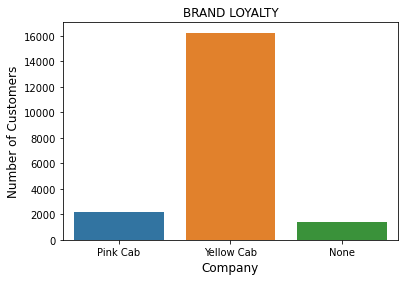

In [172]:
sns.barplot(y=[loyal_to_Pink_Cab,loyal_to_Yellow_Cab,no_loyalty], x=['Pink Cab', 'Yellow Cab', 'None'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.title('BRAND LOYALTY', fontsize=12)
plt.show()

Out of the 19129 customers who have taken more than 5 cab rides, Yellow Cab has the most brand-loyalty with about 16,000 customers.

## Conduct Time-series forecasting to predict the number of rides for each cab company for each month

In [91]:
#create function to get monthly ride totals for each cab comapny
def get_cab_monthly_ride_totals():
    
    pink_cab_monthly_rides = []
    yellow_cab_monthly_rides = []

    for year in [2016, 2017, 2018]:
        for month in [1,2,3,4,5,6,7,8,9,10,11,12]:
            pink_cab_monthly_rides.append(cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']=='Pink Cab')
                                                         & (cab_data_customer_transaction_ids['Year']==year)
                                                        & (cab_data_customer_transaction_ids['Month']==month)]['Month'].count())
            yellow_cab_monthly_rides.append(cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']=='Yellow Cab')
                                                         & (cab_data_customer_transaction_ids['Year']==year)
                                                        & (cab_data_customer_transaction_ids['Month']==month)]['Month'].count())
    return pink_cab_monthly_rides, yellow_cab_monthly_rides

In [93]:
pink_cab_monthly_rides, yellow_cab_monthly_rides = get_cab_monthly_ride_totals()

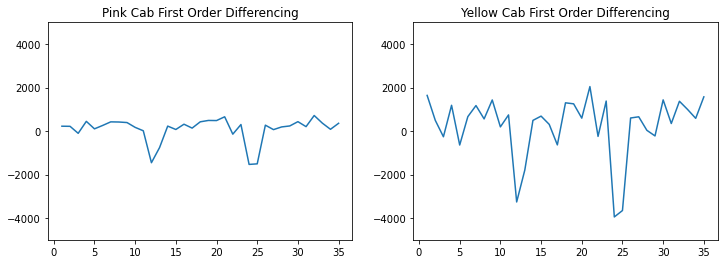

In [95]:
# PLot monthly rides after first order differencing
fig, axes = plt.subplots(1, 2, figsize = (12,4))
axes[0].plot(pd.Series(pink_cab_monthly_rides).diff().dropna())
axes[0].set_title('Pink Cab First Order Differencing')
axes[0].set_ylim([-5000,5000])
axes[1].plot(pd.Series(yellow_cab_monthly_rides).diff().dropna())
axes[1].set_ylim([-5000,5000])
axes[1].set_title('Yellow Cab First Order Differencing')

plt.show()

In [96]:
from statsmodels.tsa.stattools import adfuller #import Augmented Dickey-Fuller Test

### Hypothesis testing: Test for the stationarity of monthly total rides data using Augmented Dickey-Fuller Test

In [97]:
#H0 : The data is stationary
#H1 : The data is non-stationary

adfuller(pd.Series(pink_cab_monthly_rides).diff().dropna()) #the p-value (6.14x10**(-7)) for first order differencing for 
#Pink Cab monthly ride totals is less than 0.05 and therefore we accept the null hypothesis that the data is stationary

(-5.745078786724909,
 6.14811288840376e-07,
 10,
 24,
 {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 354.0553884828233)

In [98]:
adfuller(pd.Series(yellow_cab_monthly_rides).diff().dropna()) #the p-value (5.01x10**(-8)) for first order differencing for 
#Yellow Cab monthly ride totals is less than 0.05 and therefore we accept the null hypothesis that the data is stationary

#so we will select d=1 for the ARIMA model

(-6.229053118177731,
 5.005283843698693e-08,
 10,
 24,
 {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 408.9015031600562)

In [99]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

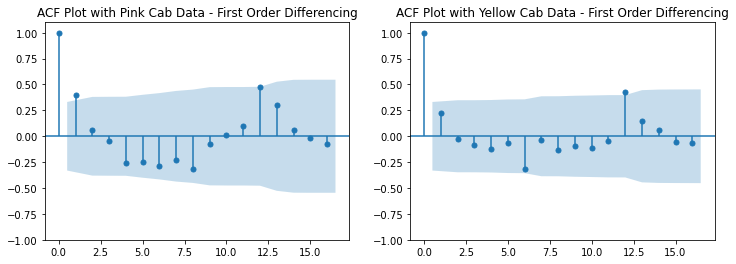

In [100]:
# Plot autocorrelation for the first order differencing for the monthly ride total data
fig, axes = plt.subplots(1, 2, figsize = (12,4))
plot_acf(pd.Series(pink_cab_monthly_rides).diff().dropna(), ax = axes[0])
axes[0].set_title('ACF Plot with Pink Cab Data - First Order Differencing')
axes[0].set_ylim([-1,1.1])
plot_acf(pd.Series(yellow_cab_monthly_rides).diff().dropna(), ax = axes[1])
axes[1].set_title('ACF Plot with Yellow Cab Data - First Order Differencing')
axes[1].set_ylim([-1,1.1])
plt.show()

# With first order differencing, the first positive correlation (i.e. first lag that is above the threshold)
# is at 1 for both datasets. So we will tentatively select q = 1 which the error term for the moving average (MA)

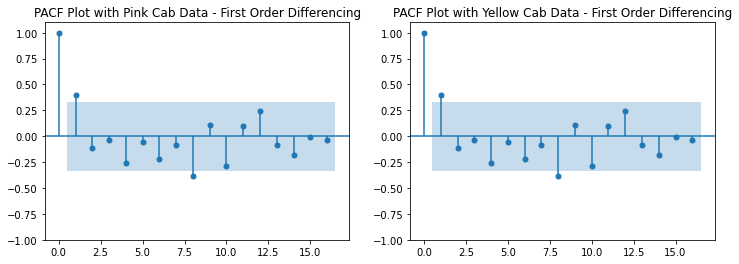

In [101]:
# Plot partial autocorrelation for the first order differencing
fig, axes = plt.subplots(1, 2, figsize = (12,4))
plot_pacf(pd.Series(pink_cab_monthly_rides).diff().dropna(), ax = axes[0], method='ywm')
axes[0].set_title('PACF Plot with Pink Cab Data - First Order Differencing')
axes[0].set_ylim([-1,1.1])
plot_pacf(pd.Series(pink_cab_monthly_rides).diff().dropna(), ax = axes[1], method='ywm')
axes[1].set_title('PACF Plot with Yellow Cab Data - First Order Differencing')
axes[1].set_ylim([-1,1.1])
plt.show()
# With first order differencing, the first lag that indicates positive correlation is also at 1
# We will therefore select p = 1 

In [102]:
#model_predictions = []

# reset the monthly ride totals using the function created above
pink_cab_monthly_rides, yellow_cab_monthly_rides = get_cab_monthly_ride_totals() 

# num_test_obser = len(pink_cab_monthly_rides)


for i in range(0,12):
    #print(pink_cab_monthly_rides)
    model = ARIMA(pd.Series(pink_cab_monthly_rides), order = (1, 1, 1)) # where p = 1 which is the number of lag observations, 
# #                                               #  d = 1 which is the number of times the raw observations are differenced to make the trend stationary
# #                                               # q = 1 which is the size of the moving average window
    model_fit =  model.fit()
    output = model_fit.forecast()

    pink_cab_monthly_rides.append(output.iloc[0])


    


In [103]:
len(pink_cab_monthly_rides)

48

<AxesSubplot:>

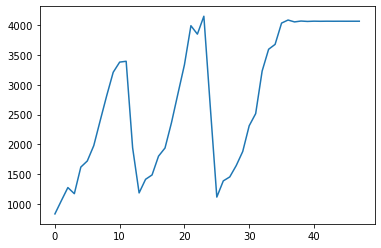

In [104]:
sns.lineplot(y=pd.Series(pink_cab_monthly_rides), x=range(48))
#forecasting over a 12 month period is difficult without continuous data input

## Conduct Time-series forecasting to predict the total profit for each cab company for 2019

In [105]:
#define function to calculate total rides for each company for each year (2016 to 2018)
def get_cab_annual_ride_totals():
    
    pink_cab_annual_rides = []
    yellow_cab_annual_rides = []

    for year in [2016, 2017, 2018]:
                
        pink_cab_annual_rides.append(cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']=='Pink Cab')
                                                         & (cab_data_customer_transaction_ids['Year']==year)]['Month'].count())
        yellow_cab_annual_rides.append(cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']=='Yellow Cab')
                                                         & (cab_data_customer_transaction_ids['Year']==year)]['Month'].count())
    return pink_cab_annual_rides, yellow_cab_annual_rides

In [107]:
pink_cab_annual_rides, yellow_cab_annual_rides = get_cab_annual_ride_totals()

In [109]:
#get annual ride totals for Pink and Yello Cab companies using the function created above
pink_cab_annual_rides, yellow_cab_annual_rides = get_cab_annual_ride_totals() 

annual_cab_rides_forecast = {}

for company,ann_ride_list in zip (['Pink Cab', 'Yellow Cab'],[pink_cab_annual_rides, yellow_cab_annual_rides]):
    

    model2 = ARIMA(pd.Series(ann_ride_list), order = (2, 1, 2)) # where p = 2 which is the number of lag observations, 
    # #                                               #  d = 1 which is the number of times the raw observations are differenced to make the trend stationary
    # #                                               # q = 2 which is the size of the moving average window
    model2_fit =  model2.fit()
    output = model2_fit.get_forecast()
    forecast = output.predicted_mean
    confid_int = output.conf_int(alpha=0.05)
    print(output, forecast.iloc[0], confid_int.iloc[0][0] ,confid_int.iloc[0][1])
    annual_cab_rides_forecast[company] = [int(forecast.iloc[0]), int(confid_int.iloc[0][0]), int(confid_int.iloc[0][1])]

C:\Users\Manj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000232BB58B550> 28642.06807529627 24272.288745409853 33011.847405182685
<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000232CB3D8E20> 92337.48772920655 78233.11052389507 106441.86493451803


In [110]:
annual_cab_rides_forecast['Pink Cab'], annual_cab_rides_forecast['Yellow Cab']

([28642, 24272, 33011], [92337, 78233, 106441])

Text(0.5, 1.0, 'Yellow Cab Ride Total Prediction for 2019')

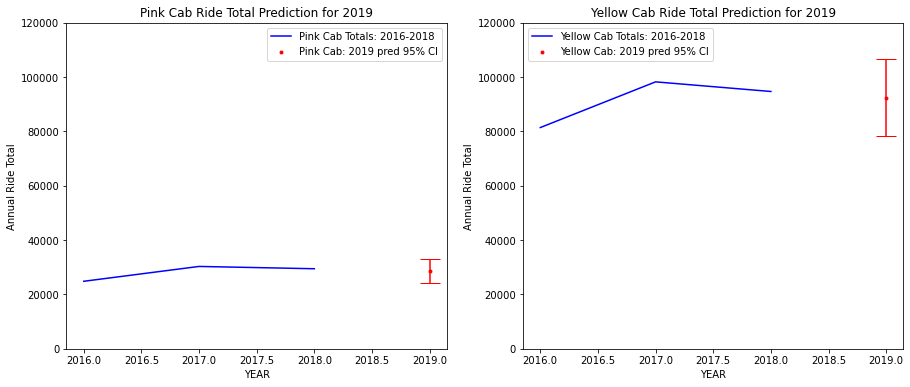

In [111]:
plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
plt.ylim(0,120000)
sns.lineplot(y=pink_cab_annual_rides, x=[2016,2017,2018], color= 'blue', label='Pink Cab: 2016-2018')
sns.scatterplot(y=annual_cab_rides_forecast['Pink Cab'][0],x=[2019], size=25, color= 'red', label='Pink Cab: 2019 pred')
plt.errorbar(y=annual_cab_rides_forecast['Pink Cab'][0],x=[2019], yerr=4370, capsize = 10, color= 'red')
plt.legend(['Pink Cab Totals: 2016-2018','Pink Cab: 2019 pred 95% CI'])
plt.xlabel('YEAR')
plt.ylabel('Annual Ride Total')
plt.title('Pink Cab Ride Total Prediction for 2019')
plt.subplot(1,2,2)
plt.ylim(0,120000)
sns.lineplot(y=yellow_cab_annual_rides, x=[2016,2017,2018], color= 'blue', label='Yellow Cab: 2016-2018')
sns.scatterplot(y=annual_cab_rides_forecast['Yellow Cab'][0],x=[2019], size=25, color= 'red', label='Yellow Cab: 2019 pred')
plt.errorbar(y=annual_cab_rides_forecast['Yellow Cab'][0],x=[2019], yerr=14104, capsize = 10, color= 'red')
plt.legend(['Yellow Cab Totals: 2016-2018','Yellow Cab: 2019 pred 95% CI'])
plt.ylabel('Annual Ride Total')
plt.xlabel('YEAR')
plt.title('Yellow Cab Ride Total Prediction for 2019')

Both companies are predicted to have fewer rides for the whole of 2019, -2.8% and -2.5% for Pink and Yellow Cab respectively. However, the actual gain/loss within the 95% confidence interval are +12% and -18% for Pink Cab and +11%  and -17% for Yellow Cab.

### Conduct Time-series forecasting to predict the total number of rides for each cab company for 2019

In [112]:
cab_data_customer_transaction_ids.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Profit per km,Year,Month,Day_of_month,Day_of_week
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,57.32,1.88,2016,1,10,Sunday
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,281.28,10.74,2018,7,23,Monday
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,194.65,4.57,2018,11,25,Sunday
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,23.67,0.83,2016,1,8,Friday
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,253.98,6.98,2018,4,23,Monday


In [113]:
#define function to calculate total profit for each company for each year (2016 to 2018)
def get_cab_annual_profit_totals():
    
    pink_cab_annual_profit = []
    yellow_cab_annual_profit = []

    for year in [2016, 2017, 2018]:
                
        pink_cab_annual_profit.append(cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']=='Pink Cab')
                                                         & (cab_data_customer_transaction_ids['Year']==year)]['Profit'].sum())
        yellow_cab_annual_profit.append(cab_data_customer_transaction_ids[(cab_data_customer_transaction_ids['Company']=='Yellow Cab')
                                                         & (cab_data_customer_transaction_ids['Year']==year)]['Profit'].sum())
    return pink_cab_annual_profit, yellow_cab_annual_profit

In [114]:
pink_cab_annual_profit, yellow_cab_annual_profit = get_cab_annual_profit_totals()
pink_cab_annual_profit, yellow_cab_annual_profit

([1686457.64, 2033435.3599999999, 1578972.3000000003],
 [13786936.990000002, 16586613.300000003, 13609460.510000002])

In [115]:
#get annual ride totals for Pink and Yello Cab companies using the function created above
pink_cab_annual_profit, yellow_cab_annual_profit = get_cab_annual_profit_totals() 

annual_cab_profit_forecast = {}

for company,ann_profit_list in zip (['Pink Cab', 'Yellow Cab'],[pink_cab_annual_profit, yellow_cab_annual_profit]):
    

    model3 = ARIMA(pd.Series(ann_profit_list), order = (2, 1, 2)) # where p = 2 which is the number of lag observations, 
    # #                                               #  d = 1 which is the number of times the raw observations are differenced to make the trend stationary
    # #                                               # q = 2 which is the size of the moving average window
    model3_fit =  model3.fit()
    output = model3_fit.get_forecast()
    forecast = output.predicted_mean
    confid_int = output.conf_int(alpha=0.05) #95% confidence interval
    print(output, forecast.iloc[0], confid_int.iloc[0][0] ,confid_int.iloc[0][1])
    annual_cab_profit_forecast[company] = [int(forecast.iloc[0]), int(confid_int.iloc[0][0]), int(confid_int.iloc[0][1])]

C:\Users\Manj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000232BB3CA1F0> 1348618.9391153941 793258.9417223472 1903978.936508441
<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000232BB3CAEE0> 12126613.833666148 8123549.006059747 16129678.661272548


In [116]:
annual_cab_profit_forecast

{'Pink Cab': [1348618, 793258, 1903978],
 'Yellow Cab': [12126613, 8123549, 16129678]}

Text(0.5, 1.0, 'Yellow Cab Profit Prediction for 2019')

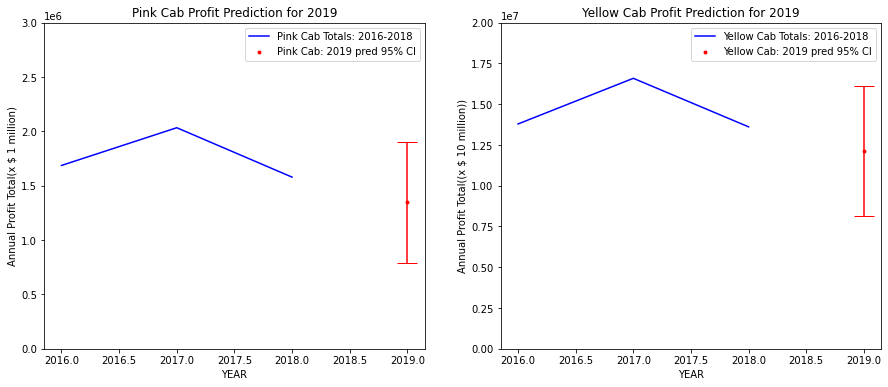

In [117]:
plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
plt.ylim(0,3000000)
sns.lineplot(y=pink_cab_annual_profit, x=[2016,2017,2018], color= 'blue', label='Pink Cab: 2016-2018')
sns.scatterplot(y=annual_cab_profit_forecast['Pink Cab'][0],x=[2019], size=25, color= 'red', label='Pink Cab: 2019 pred')
plt.errorbar(y=annual_cab_profit_forecast['Pink Cab'][0],x=[2019], yerr=555360, capsize = 10, color= 'red')
plt.legend(['Pink Cab Totals: 2016-2018','Pink Cab: 2019 pred 95% CI'])
plt.xlabel('YEAR')
plt.ylabel('Annual Profit Total(x $ 1 million)')
plt.title('Pink Cab Profit Prediction for 2019')
plt.subplot(1,2,2)
plt.ylim(0,20000000)
sns.lineplot(y=yellow_cab_annual_profit, x=[2016,2017,2018], color= 'blue', label='Yellow Cab: 2016-2018')
sns.scatterplot(y=annual_cab_profit_forecast['Yellow Cab'][0],x=[2019], size=25, color= 'red', label='Yellow Cab: 2019 pred')
plt.errorbar(y=annual_cab_profit_forecast['Yellow Cab'][0],x=[2019], yerr=4003065, capsize = 10, color= 'red')
plt.legend(['Yellow Cab Totals: 2016-2018','Yellow Cab: 2019 pred 95% CI'])
plt.ylabel('Annual Profit Total((x $ 10 million))')
plt.xlabel('YEAR')
plt.title('Yellow Cab Profit Prediction for 2019')